> IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math

> IMPORT DATASETS

In [2]:
player_data = pd.read_csv('bukayo_saka_data.csv')
player_data['Season'] = player_data['Season'].str.split('/').str[0]
player_data

,No,Season,Team,Apps,Min,G,A,Sh90,KP90,xG,xA,xG90,xA90
0,1,2023,Arsenal,11,962,4,4,2.06,2.34,4.65,3.34,0.44,0.31
1,2,2022,Arsenal,38,3216,14,11,2.49,2.10,11.30,7.04,0.32,0.20
2,3,2021,Arsenal,38,3034,11,7,2.88,2.02,9.91,7.63,0.29,0.23
3,4,2020,Arsenal,32,2577,5,3,2.13,1.33,7.17,4.51,0.25,0.16
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,3.68,0.06,0.19


In [3]:
team_data = pd.read_csv('arsenal_data.csv')
team_data['Season'] = team_data['Season'].str.split('/').str[0]
team_data

,No,Season,Team,Apps,Min,G,A,Sh90,KP90,xG,xA,xG90,xA90
0,1,2023,Arsenal,11,962,25,14,14.52,10.68,23.16,14.21,1.93,1.19
1,2,2022,Arsenal,38,3216,84,64,15.57,11.70,77.36,55.78,2.03,1.47
2,3,2021,Arsenal,38,3034,60,41,15.48,11.41,64.55,39.97,1.71,1.06
3,4,2020,Arsenal,32,2577,53,38,12.01,8.74,53.26,36.21,1.41,0.96
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,3.68,0.06,0.19


In [4]:
merged_data = pd.merge(player_data, team_data, on=['Season', 'Team'])
merged_data

,No_x,Season,Team,Apps_x,Min_x,G_x,A_x,Sh90_x,KP90_x,xG_x,...,Apps_y,Min_y,G_y,A_y,Sh90_y,KP90_y,xG_y,xA_y,xG90_y,xA90_y
0,1,2023,Arsenal,11,962,4,4,2.06,2.34,4.65,...,11,962,25,14,14.52,10.68,23.16,14.21,1.93,1.19
1,2,2022,Arsenal,38,3216,14,11,2.49,2.10,11.30,...,38,3216,84,64,15.57,11.70,77.36,55.78,2.03,1.47
2,3,2021,Arsenal,38,3034,11,7,2.88,2.02,9.91,...,38,3034,60,41,15.48,11.41,64.55,39.97,1.71,1.06
3,4,2020,Arsenal,32,2577,5,3,2.13,1.33,7.17,...,32,2577,53,38,12.01,8.74,53.26,36.21,1.41,0.96
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,...,26,1769,1,5,0.66,1.07,1.14,3.68,0.06,0.19


In [6]:
tr_data = merged_data
tr_data = tr_data.drop(0)
tr_data

,No_x,Season,Team,Apps_x,Min_x,G_x,A_x,Sh90_x,KP90_x,xG_x,...,Apps_y,Min_y,G_y,A_y,Sh90_y,KP90_y,xG_y,xA_y,xG90_y,xA90_y
1,2,2022,Arsenal,38,3216,14,11,2.49,2.10,11.30,...,38,3216,84,64,15.57,11.70,77.36,55.78,2.03,1.47
2,3,2021,Arsenal,38,3034,11,7,2.88,2.02,9.91,...,38,3034,60,41,15.48,11.41,64.55,39.97,1.71,1.06
3,4,2020,Arsenal,32,2577,5,3,2.13,1.33,7.17,...,32,2577,53,38,12.01,8.74,53.26,36.21,1.41,0.96
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,...,26,1769,1,5,0.66,1.07,1.14,3.68,0.06,0.19


> CALCULATING xGTREND AND xATREND

In [8]:
predicted_apps = 37
tr_data['xG_trend'] = merged_data['xG_x'] / merged_data['Apps_x'] * predicted_apps
tr_data['xA_trend'] = merged_data['xA_x'] / merged_data['Apps_x'] * predicted_apps
tr_data

,No_x,Season,Team,Apps_x,Min_x,G_x,A_x,Sh90_x,KP90_x,xG_x,...,G_y,A_y,Sh90_y,KP90_y,xG_y,xA_y,xG90_y,xA90_y,xG_trend,xA_trend
1,2,2022,Arsenal,38,3216,14,11,2.49,2.10,11.30,...,84,64,15.57,11.70,77.36,55.78,2.03,1.47,11.002632,6.854737
2,3,2021,Arsenal,38,3034,11,7,2.88,2.02,9.91,...,60,41,15.48,11.41,64.55,39.97,1.71,1.06,9.649211,7.429211
3,4,2020,Arsenal,32,2577,5,3,2.13,1.33,7.17,...,53,38,12.01,8.74,53.26,36.21,1.41,0.96,8.290313,5.214688
4,5,2019,Arsenal,26,1769,1,5,0.66,1.07,1.14,...,1,5,0.66,1.07,1.14,3.68,0.06,0.19,1.622308,5.236923


> FEATURE TUNING

In [9]:
shared_features = ['Min_x', 'G_y', 'A_y', 'Sh90_y', 'KP90_y', 'xG_y', 'xA_y', 'xG90_y', 'xA90_y']

xG_specific_features = ['xG_x', 'G_x', 'Sh90_y', 'xG90_x'] 
xA_specific_features = ['xA_x', 'A_x', 'KP90_x', 'xA90_x']  

x_xG = tr_data[shared_features + xG_specific_features].astype(float)
x_xA = tr_data[shared_features + xA_specific_features].astype(float)

y_xG = tr_data['xG_trend'].values
y_xA = tr_data['xA_trend'].values


> HYPERPARAMATER TUNING AND MODEL FITTING

In [10]:
model_xG = RandomForestRegressor(max_depth=None,n_estimators=1000, random_state=42)
model_xG.fit(x_xG, y_xG)
model_xA = RandomForestRegressor(max_depth=None,n_estimators=1000, random_state=42)
model_xA.fit(x_xA, y_xA)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [11]:
current_season = '2022'
curr_season_data = merged_data[merged_data['Season'] == current_season]
curr_season_features_xG = curr_season_data[shared_features + xG_specific_features].astype(float)
curr_season_features_xA = curr_season_data[shared_features + xA_specific_features].astype(float)

> PREDICT METHOD FOR XG AND XA

In [12]:
projected_xG = model_xG.predict(curr_season_features_xG)[0]
projected_xA = model_xA.predict(curr_season_features_xA)[0]
print(f"Projected final xG (Random Forest): {projected_xG:.2f}")
print(f"Projected final xA (Random Forest): {projected_xA:.2f}")


Projected final xG (Random Forest): 10.49
Projected final xA (Random Forest): 6.89


> CALCULATING RMSE

In [13]:

predicted_xG = model_xG.predict(x_xG)
predicted_xA = model_xA.predict(x_xA)
rmse_xG = math.sqrt(mean_squared_error(y_xG, predicted_xG))
rmse_xA = math.sqrt(mean_squared_error(y_xA, predicted_xA))

range_xG = np.max(y_xG) - np.min(y_xG)
range_xA = np.max(y_xA) - np.min(y_xA)

rmse_percent_xG = (rmse_xG / range_xG) * 100
rmse_percent_xA = (rmse_xA / range_xA) * 100

print(f"RMSE for xG: {rmse_xG:.2f}")
print(f"RMSE for xA: {rmse_xA:.2f}")
print(f"RMSE for xG: {rmse_percent_xG:.2f}%" + " (Normalized)")
print(f"RMSE for xA: {rmse_percent_xA:.2f}%" + " (Normalized)")

RMSE for xG: 1.21
RMSE for xA: 0.35
RMSE for xG: 12.85% (Normalized)
RMSE for xA: 15.68% (Normalized)


> CROSS VALIDATION

In [15]:
cv_score_xG = cross_val_score(model_xG, x_xG, y_xG, cv=4, scoring='neg_mean_squared_error')
rmse_cv_xG = np.sqrt(-cv_score_xG)
print(f"Cross-validated RMSE for xG: {np.mean(rmse_cv_xG):.2f}")

cv_score_xA = cross_val_score(model_xA, x_xA, y_xA, cv=4, scoring='neg_mean_squared_error')
rmse_cv_xA = np.sqrt(-cv_score_xA)
print(f"Cross-validated RMSE for xA: {np.mean(rmse_cv_xA):.2f}")

Cross-validated RMSE for xG: 2.57
Cross-validated RMSE for xA: 0.96


> PLOT OF THE RESULT

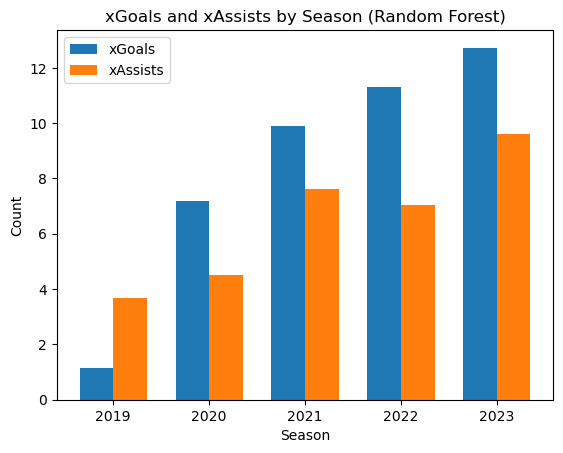

In [246]:
player_data['Season'] = player_data['Season'].str.split('/').str[0]
seasons = player_data['Season'].unique()
seasons = seasons[seasons != '2023']

seasons = [int(season) for season in seasons]
seasons.sort()

seasons = [str(season) for season in seasons]

goals = []
assists = []
for season in seasons:
    season_xgoals = player_data[player_data['Season'] == season]['xG'].values[0]
    season_xassists = player_data[player_data['Season'] == season]['xA'].values[0]
    goals.append(season_xgoals)
    assists.append(season_xassists)

seasons.append('2023')
goals.append(projected_xG)
assists.append(projected_xA)

width = 0.35
x = np.arange(len(seasons))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, goals, width, label='xGoals')
rects2 = ax.bar(x + width/2, assists, width, label='xAssists')

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('xGoals and xAssists by Season (Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()


In [247]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grids
param_grid_xG = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

param_grid_xA = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

# Grid Search for xG and xA models
grid_search_xG = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_xG,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)
grid_search_xA = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_xA,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

# Fit Grid Search to the data for xG and xA models
grid_search_xG.fit(x_xG, y_xG)
grid_search_xA.fit(x_xA, y_xA)

# Best hyperparameters for xG and xA models
best_params_xG = grid_search_xG.best_params_
best_params_xA = grid_search_xA.best_params_

print("Best hyperparameters for xG:", best_params_xG)
print("Best hyperparameters for xA:", best_params_xA)
